**Please visit https://ProStepSky.github.io/.**

This work © 2024 by "ProStepSky.github.io จัดทำโดย S.U." is licensed under [CC BY-NC-ND 4.0](http://creativecommons.org/licenses/by-nc-nd/4.0/)  
(อ้างอิงแหล่งที่มา ห้ามนำไปใช้เพื่อการค้า และห้ามดัดแปลง)

---

**Note:**

Notebook นี้ แสดงการสร้าง **scorecard** คือ การเปลี่ยน PD Model ให้เป็นแบบ simplified version เพื่อทำให้ผู้คนที่มาจากทุก background สามารถเข้าใจได้และใช้งานได้ง่ายที่สุด ดังนั้น การใช้งาน **scorecard** ก็คือการใช้งาน PD Model

**Scorecard** ใช้สำหรับทำนายความน่าเชื่อถือทางเครดิตสำหรับแต่ละบุคคล เรียกว่า credit score ซึ่งจะสัมพันธ์โดยตรงกับความน่าจะเป็นที่จะผิดนัดชำระหนี้

---

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Suppress all warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Set the pandas DataFrame options to display all columns/rows.

# Loading the Data and Selecting the Features

### Import Data

In [4]:
loan_data_inputs_train = pd.read_csv('./data/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('./data/loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('./data/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('./data/loan_data_targets_test.csv', index_col = 0)
# index_col = 0, makes sure the 1st column of the csv will be used as index.

# For old version conda environments that export target csv files without a column name,
# use 'header = None' to prevent making the 1st row as a header.
#loan_data_targets_train = pd.read_csv('./data/loan_data_targets_train.csv', index_col = 0, header = None)
#loan_data_targets_test = pd.read_csv('./data/loan_data_targets_test.csv', index_col = 0, header = None)

เปิด PD model (Logistic Regression model) จาก disk:

In [5]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    # Inherit everything from the original LogisticRegression class.
    def __init__(self,*args,**kwargs):#,**kwargs):
        
        # -------------------------------------------------------
        # This function will be provided upon request. Thank you.
        # -------------------------------------------------------

    # Overwrite .fit() with a function that calculate p-values.
    def fit(self,X,y):
        
        # -------------------------------------------------------
        # This function will be provided upon request. Thank you.
        # -------------------------------------------------------

In [6]:
import pickle

In [7]:
filehandler = open('./data/pd_model.pkl','rb')
reg2 = pickle.load(filehandler)
filehandler.close()

สร้าง DataFrame เพื่อเก็บเพียงแค่ dummy variables ที่ใช้กับ Final PD Model ซึ่งคัดเลือกแล้วว่ามีส่วนช่วยในการทำนายการผิดนัดชำระหนี้:

In [8]:
# Copied from the previous notebooks.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:smb_edu_mov_house_renew_wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth_med_vacation',
'purpose:homeimpv_majorpurch_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-184',
'mths_since_earliest_cr_line:185-264',
'mths_since_earliest_cr_line:265-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [9]:
# Copied from the previous notebooks.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:smb_edu_mov_house_renew_wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth_med_vacation',
'purpose:homeimpv_majorpurch_car',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<=9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-184',
'mths_since_earliest_cr_line:185-264',
'mths_since_earliest_cr_line:265-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

สร้างตัวแปร ref_categories เก็บชื่อของ reference category dummy variables ที่ใช้กับ Final PD Model ซึ่งคัดเลือกแล้วว่ามีส่วนช่วยในการทำนายการผิดนัดชำระหนี้:

In [10]:
# Copied from the previous notebooks.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:smb_edu_mov_house_renew_wedd',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',     
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

ทำการ drop ตัวแปรที่เป็น dummy variable reference categories:

In [11]:
# Copied from the previous notebook.
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:homeimpv_majorpurch_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-184,mths_since_earliest_cr_line:185-264,mths_since_earliest_cr_line:265-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,0,False,0,0,0,0,0,False,0,1,0,False,True,False,True,0,0,False,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,True,False,False,True,0,0,False,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,0,False,0,0,0,1,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,0,False,0,0,1,0,0,False,0,0,0,False,True,False,True,0,0,False,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,0,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0


ทำการ drop ตัวแปรที่เป็น dummy variable reference categories:

In [12]:
# Copied from the previous notebook.
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:homeimpv_majorpurch_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mths_since_earliest_cr_line:141-184,mths_since_earliest_cr_line:185-264,mths_since_earliest_cr_line:265-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


สร้าง DataFrame ที่มีการคำนวณ Coefficients และ p_values:

In [13]:
# Copied from the previous notebook.
feature_name = inputs_train.columns.values

In [14]:
# Copied from the previous notebook.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

เพิ่ม p-values ที่ได้จากการคำนวณลงไปใน summary_table:

In [15]:
# Copied from the previous notebook.
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

ทำการทำนาย Probability of Default (PD) ของแต่ละผู้ขอกู้จาก test dataset (ไม่ทำนายว่าผิดนัดชำระหนี้หรือไม่ แต่จะให้ผลลัพธ์คือความน่าจะเป็นดิบ หรือ raw probabilities):

In [16]:
# Copied from the previous notebook.
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

เลือกเก็บเฉพาะ column ที่สอง (ความน่าจะเป็นที่จะเป็น good borrower):

In [17]:
# Copied from the previous notebook.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

ทำการรวมค่าจริง (loan_data_targets_test) กับค่าทำนาย (y_hat_test_proba) ไว้ใน DataFrame เดียวกัน:

In [18]:
# Copied from the previous notebook.
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [19]:
# Copied from the previous notebook.
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.919278
288564,1,0.861756
213591,1,0.883720
263083,1,0.934505
165001,1,0.967827


---
---
---

# ➡ <font color='dodgerblue'><u>Applying the PD Model (Scorecard)</u></font> ⬅

### PD of individual accounts

การหาโอกาสที่บุคคลนั้น ๆ จะไม่ผิดนัดชำระหนี้:

หากเป็น False ให้คูณสัมประสิทธิ์ $\beta$ ของ dummy variable นั้น ด้วย 0

หากเป็น True ให้คูณสัมประสิทธิ์ $\beta$ ของ dummy variable นั้น ด้วย 1

จากนั้นหาผลรวมของ intercept กับ ทุกพจน์ของ dummy variables จะได้ natural log ของโอกาสที่จะไม่ผิดนัดชำระหนี้ต่อโอกาสที่จะผิดนัดชำระหนี้ดังสมการ:

$$\begin{align*}
\ln\left(\text{odds}\right) & = \ln\left( \frac{\text{Non-defaults}}{\text{Defaults}} \right) \\
& = \ln\left( \frac{\text{1-PD}}{\text{PD}} \right) \\
& = \text{Intercept} + \sum_{j=1}^{m} \beta_{j}X_{j} \\
& = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{m}X_{m}
\end{align*}$$

In [20]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:smb_edu_mov_house_renew_wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:homeimpv_majorpurch_car,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-184,mths_since_earliest_cr_line:185-264,mths_since_earliest_cr_line:265-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


สัมประสิทธิ์สำหรับแต่ละ dummy variable:

In [21]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.439057,NaN
1,grade:A,1.103571,6.310332e-34
2,grade:B,0.879796,5.070084e-47
3,grade:C,0.684812,8.143351e-34
4,grade:D,0.494995,2.094061e-20
5,grade:E,0.321767,9.674439e-12
6,grade:F,0.135650,5.704202e-03
7,home_ownership:OWN,0.092316,4.723266e-06
8,home_ownership:MORTGAGE,0.104649,1.462758e-16
9,addr_state:NM_VA,0.037435,2.424949e-01


ทุกหนึ่งหน่วยของตัวแปรที่เพิ่มขึ้นจะทำให้ค่า ln(odds) เปลี่ยนไปเท่ากับค่าสัมประสิทธิ์ของตัวแปรนั้น โดยแปรผลได้ดังนี้

>ยกตัวอย่าง: ถ้า purpose เป็น credit_card ค่า ln(odds) จะเพิ่มขึ้น 0.305787
>
>ยกตัวอย่าง: ถ้า verification_status เป็น Source Verified ค่า ln(odds) จะลดลง 0.008424

ยกตัวอย่างการคำนวณความน่าจะเป็นที่ผู้ขอกู้ ID = 362514 จะไม่ผิดนัดชำระหนี้:

$$\begin{align*}
\ln\left( \frac{\text{1-PD}}{\text{PD}} \right) & = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{2} + ... + \beta_{m}X_{m} \\
\ln\left( \frac{\text{1-PD}}{\text{PD}} \right) & = 2.43258 \\
\frac{\text{1-PD}}{\text{PD}} & = e^{2.43258} \\
\frac{\text{1-PD}}{\text{PD}} & = 11.38820 \\
\text{1-PD} & = \frac{11.38820}{11.38820+1} \\
\text{1-PD} & = 0.91927803
\end{align*}$$

โอกาสที่ผู้ขอกู้ ID = 362514 จะไม่ผิดนัดชำระหนี้ เท่ากับ 0.91927803 หรือ 91.92%

แสดงค่าในตัวแปร y_hat_test_proba ซึ่งเก็บค่าโอกาสที่บุคคลนั้น ๆ จะไม่ผิดนัดชำระหนี้:

In [22]:
y_hat_test_proba

array([0.91927803, 0.86175606, 0.8837204 , ..., 0.97568033, 0.95743284,
       0.94990575])

---

### Creating a Scorecard

ตอนทำ Model Extimation จะต้องนำ reference categories ออกจาก PD Model และแทนค่า reference categories ด้วย 0 เมื่อใช้ทำนาย probability of default

แต่เนื่องจากการสร้าง scorecard จะต้องทำให้ผู้คนที่มาจากทุก background สามารถเข้าใจได้และใช้งานได้ง่ายที่สุด จึงต้องใส่ reference categories เข้าไปใน scorecard ด้วย

ดังต่อไปนี้:

In [23]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:smb_edu_mov_house_renew_wedd',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [24]:
# Create a 'Feature name' column with row values from the 'ref_categories'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])

# Add a 'Coefficients' column, which contains only 0 values.
df_ref_categories['Coefficients'] = 0

# Add a 'p_values' column, which contains only NaN values.
df_ref_categories['p_values'] = np.nan

df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:smb_edu_mov_house_renew_wedd,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


สร้าง scorecard โดยผสาน summary_table กับ df_ref_categories:

In [25]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.439057,NaN
1,1,grade:A,1.103571,6.310332e-34
2,2,grade:B,0.879796,5.070084e-47
3,3,grade:C,0.684812,8.143351e-34
4,4,grade:D,0.494995,2.094061e-20
5,5,grade:E,0.321767,9.674439e-12
6,6,grade:F,0.135650,5.704202e-03
7,7,home_ownership:OWN,0.092316,4.723266e-06
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16
9,9,addr_state:NM_VA,0.037435,2.424949e-01


สร้าง column ใหม่เพื่อเก็บชื่อตัวแปรต้นฉบับ เพื่อใช้ในขั้นตอน groupby ถัดไป:

In [26]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [27]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.439057,NaN,Intercept
1,1,grade:A,1.103571,6.310332e-34,grade
2,2,grade:B,0.879796,5.070084e-47,grade
3,3,grade:C,0.684812,8.143351e-34,grade
4,4,grade:D,0.494995,2.094061e-20,grade
5,5,grade:E,0.321767,9.674439e-12,grade
6,6,grade:F,0.135650,5.704202e-03,grade
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state


ก่อนจะสร้าง scorecard ต้อง rescale สัมประสิทธิ์ PD model ให้เป็นคะแนนปกติเหมือน FICO score ก่อน คือ ต่ำสุดที่ 300 คะแนน, สูงสุดที่ 850 คะแนน:

In [28]:
min_score = 300
max_score = 850

คะแนนต่ำสุด คือ เมื่อสมมติให้ผู้ขอกู้ถูกจัดอยู่ใน categories ที่แย่ที่สุด ของทุกตัวแปร

คะแนนสูงสุด คือ เมื่อสมมติให้ผู้ขอกู้ถูกจัดอยู่ใน categories ที่ดีที่สุด ของทุกตัวแปร

**ใช้ groupby แล้วหาค่าต่ำสุดของ category ในตัวแปรอิสระนั้น ๆ:**

In [29]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.439057
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.076059
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.079210
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
total_rev_hi_lim               0.000000
verification_status           -0.008424
Name: Coefficients, dtype: float64

Note: ค่า Intercept มีเพียงค่าเดียวอยู่แล้ว

หาค่าที่ต่ำที่สุดที่เป็นไปได้ (คือเมื่อผู้ขอกู้ถูกจัดอยู่ใน categories ที่แย่ที่สุด ทุก categories) โดยรวมค่าต่ำสุดของ categories ในตัวแปรอิสระทุกตัว:

In [30]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.6027510610894098

**ใช้ groupby แล้วหาค่าสูงสุดของ category ในตัวแปรอิสระนั้น ๆ:**

In [31]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.439057
acc_now_delinq                 0.193366
addr_state                     0.524992
annual_inc                     0.553164
dti                            0.401099
emp_length                     0.125232
grade                          1.103571
home_ownership                 0.104649
initial_list_status            0.054893
inq_last_6mths                 0.694585
int_rate                       0.891931
mths_since_earliest_cr_line    0.107926
mths_since_issue_d             0.960736
mths_since_last_delinq         0.192639
mths_since_last_record         0.534676
purpose                        0.305787
term                           0.079168
total_rev_hi_lim               0.213901
verification_status            0.086008
Name: Coefficients, dtype: float64

หาค่าที่สูงที่สุดที่เป็นไปได้ (คือเมื่อผู้ขอกู้ถูกจัดอยู่ใน categories ที่ดีที่สุด ทุก categories) โดยรวมค่าสูงสุดของ categories ในตัวแปรอิสระทุกตัว:

In [32]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.689265990972369

**ทำการ rescale สัมประสิทธิ์ให้เป็นคะแนน**

โดยคูณค่าสัมประสิทธิ์ด้วย อัตราส่วนระหว่าง ผลต่างระหว่างคะแนนสูงสุดและต่ำสุด ต่อ ผลต่างระหว่างสัมประสิทธิ์สูงสุดและต่ำสุด:

$$variable\_score = variable\_coef \frac{ max\_score - min\_score }{max\_sum\_coef - min\_sum\_coef}$$

In [33]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.439057,NaN,Intercept,-108.540834
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528


จากตารางข้างบน column ชื่อ "Score - Calculation" คะแนนทุกตัวดูปกติ

ยกเว้นของตัวแปร intercept ตัวเดียว เนื่องจากตัวแปร intercept ไม่ใช่ dummy variable

สมการคำนวณคะแนนของ intercept:

$$intercept\_score = \frac{(intercept\_coef - min\_score)}{(max\_sum\_coef - min\_sum\_coef)} (max\_score - min\_score) + min\_score$$

- $\frac{(intercept\_coef - min\_score)}{(max\_sum\_coef - min\_sum\_coef)}$ เพื่อหาจุดที่ intercept อยู่ใน scale ระหว่าง 0 ถึง 1

- $(max\_score - min\_score)$ เพื่อหาความกว้างของช่วงคะแนน = 850 - 300 = 550 คะแนน

- $+ min\_score$ เพื่อยกคะแนนขึ้น ให้มีช่วงอยู่ระหว่าง 300 ถึง 850 คะแนน

คำนวณคะแนนของ intercept:

In [34]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.439057,NaN,Intercept,312.346580
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528


ปัดเศษคะแนนให้เป็นจำนวนเต็ม เพื่อให้ scorecard นี้ สามารถนำไปใช้งานได้ง่ายที่สุด:

In [35]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.439057,NaN,Intercept,312.346580,312.0
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752,83.0
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579,66.0
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928,52.0
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976,37.0
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264,24.0
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364,10.0
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899,7.0
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165,8.0
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528,3.0


ตรวจสอบว่าคะแนนต่ำสุดและสูงสุดที่เป็นไปได้ เท่ากับ 300 และ 850 คะแนน หรือไม่:

In [36]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

299.0

In [37]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

848.0

จากข้างบนพบว่า คะแนนต่ำสุดและสูงสุดที่เป็นไปได้ เท่ากับ 299 และ 848 คะแนน เนื่องจากการปัดเศษ

หาผลต่างระหว่างคะแนนที่ปัดเศษแล้วกับคะแนนก่อนจะปัดเศษ:

In [38]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.439057,NaN,Intercept,312.346580,312.0,-0.346580
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752,83.0,-0.236752
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579,66.0,-0.358579
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928,52.0,0.348072
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976,37.0,-0.334976
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264,24.0,-0.269264
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364,10.0,-0.231364
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899,7.0,0.037101
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165,8.0,0.106835
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528,3.0,0.176472


In [39]:
#df_scorecard.sort_values(['Difference'])

ชดเชยค่าให้กับตัวแปรที่มีการปัดเศษที่มากที่สุด เพื่อให้คะแนนต่ำสุดและสูงสุดมีค่า เท่ากับ 300 และ 850 คะแนน:

In [40]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][68] = 30 # annual_inc:90K-100K
df_scorecard['Score - Final'][22] = 7 # verification_status:Not Verified
df_scorecard['Score - Final'][80] = 9 # mths_since_last_delinq:Missing
df_scorecard['Score - Final'][0] = 313 # Intercept
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.439057,NaN,Intercept,312.346580,312.0,-0.346580,313.0
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752,83.0,-0.236752,83.0
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579,66.0,-0.358579,66.0
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928,52.0,0.348072,52.0
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976,37.0,-0.334976,37.0
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264,24.0,-0.269264,24.0
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364,10.0,-0.231364,10.0
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899,7.0,0.037101,7.0
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165,8.0,0.106835,8.0
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528,3.0,0.176472,3.0


ตรวจสอบคะแนนต่ำสุดและสูงสุดที่เป็นไปได้:

In [41]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [42]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

จากข้างบนพบว่า คะแนนต่ำสุดและสูงสุดที่เป็นไปได้ เท่ากับ 300 และ 850 คะแนนแล้ว

---

### Caclulating Credit Score

In [43]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:smb_edu_mov_house_renew_wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:homeimpv_majorpurch_car,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-184,mths_since_earliest_cr_line:185-264,mths_since_earliest_cr_line:265-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [44]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.439057,NaN,Intercept,312.346580,312.0,-0.346580,313.0
1,1,grade:A,1.103571,6.310332e-34,grade,83.236752,83.0,-0.236752,83.0
2,2,grade:B,0.879796,5.070084e-47,grade,66.358579,66.0,-0.358579,66.0
3,3,grade:C,0.684812,8.143351e-34,grade,51.651928,52.0,0.348072,52.0
4,4,grade:D,0.494995,2.094061e-20,grade,37.334976,37.0,-0.334976,37.0
5,5,grade:E,0.321767,9.674439e-12,grade,24.269264,24.0,-0.269264,24.0
6,6,grade:F,0.135650,5.704202e-03,grade,10.231364,10.0,-0.231364,10.0
7,7,home_ownership:OWN,0.092316,4.723266e-06,home_ownership,6.962899,7.0,0.037101,7.0
8,8,home_ownership:MORTGAGE,0.104649,1.462758e-16,home_ownership,7.893165,8.0,0.106835,8.0
9,9,addr_state:NM_VA,0.037435,2.424949e-01,addr_state,2.823528,3.0,0.176472,3.0


หากจะบวกพจน์ผลคูณของค่าของตัวแปรอิสระกับสัมประสิทธิ์ก่อน แล้วค่อยบวกด้วยค่า intercept อีกครั้งก็สามารถทำได้

แต่หากใช้วิธีการเพิ่ม column ชื่อ intercept ไว้ล่วงหน้า จะทำให้สะดวกกว่ากันมาก เพราะแค่ดำเนินการคูณแบบ dot product เพียงครั้งเดียว ก็จะได้ค่า credit score ทันที

ทำการเพิ่ม column ชื่อ intercept ไว้ล่วงหน้า:

In [45]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [46]:
# Insert an 'Intercept' column with an index of 0 (1st column).
# Its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [47]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:smb_edu_mov_house_renew_wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth_med_vacation,purpose:homeimpv_majorpurch_car,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-184,mths_since_earliest_cr_line:185-264,mths_since_earliest_cr_line:265-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


ต้องทำให้แน่ใจว่า columns ของ Test Dataset มีลำดับที่เรียงตรงกันกับ scorecard โดยกำหนดให้เรียง columns ตามค่า Feature name ของ scorecard:

In [48]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

สร้างตัวแปร scorecard_scores เพื่อเก็บค่าคะแนนของแต่ละตัวแปรอิสระที่อยู่ใน scorecard:

In [49]:
scorecard_scores = df_scorecard['Score - Final']

ตรวจสอบมิติของตัวแปรที่จะนำมาดำเนินการคูณแบบ dot product:

In [50]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 108)

In [51]:
scorecard_scores.shape

(108,)

ทำมิติของ scorecard_scores ให้สามารถ dot product กับ inputs_test_with_ref_cat_w_intercept ได้:

In [52]:
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0], 1)

In [53]:
scorecard_scores.shape

(108, 1)

ดำเนินการคูณแบบ dot product (คูณแต่ละ dummy variable ของ Test Dataset ด้วยคะแนนจาก scorecard แล้ว sum รวมกัน):

In [54]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [55]:
y_scores.head()

,0
362514,605.0
288564,558.0
213591,574.0
263083,622.0
165001,677.0


In [56]:
y_scores.tail()

,0
115,571.0
296284,680.0
61777,699.0
91763,656.0
167512,644.0


ได้ผลลัพธ์เป็น credit scores สำหรับผู้ขอกู้ทุกรายใน Test Dataset แล้ว

---

### From Credit Score to PD

การนำค่า credit scores มาทำการคำนวณ Probability of Default สามารถเกิดขึ้นได้บ่อยมากในทางปฏิบัติ

ทำได้โดย reverse engineer จาก credit scores ให้เป็นผลรวมสัมประสิทธิ์ของ PD model โดยใช้การดำเนินการทางเลขคณิตที่ **ตรงกันข้าม** กับขั้นตอนการแปลง PD model ให้เป็น scorecard ที่เคยทำไปก่อนหน้านี้

จะได้เป็นการดำเนินการทางเลขคณิตดังนี้:

$$sum\_of\_coef\_from\_score = \frac{(total\_score - min\_score)}{(max\_score - min\_score)} (max\_sum\_coef - min\_sum\_coef) + min\_sum\_coef$$

คำนวณผลรวมสัมประสิทธิ์ของ PD model:

In [57]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [58]:
sum_coef_from_score[0:5]

,0
362514,2.441004
288564,1.817868
213591,2.029999
263083,2.666393
165001,3.395595


ผลรวมสัมประสิทธิ์ของ PD model ที่ได้นี้ ยังไม่สามารถใช้งานอะไรได้ ต้องนำไปคำนวณต่อ

Take exponent ให้กับผลรวมสัมประสิทธิ์ของ PD model ที่ได้ (เผื่อปลด natural log) แล้วหารด้วย exponent ของผลรวมสัมประสิทธิ์ของ PD model + 1

จะได้ความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้:

$$y\_hat\_proba\_from\_score = \frac{e^{(sum\_coef\_from\_score)}}{e^{(sum\_coef\_from\_score)}+1}$$

ความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ ที่ได้จาก credit scores:

In [59]:
#y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score = np.exp(np.float64(sum_coef_from_score)) / (np.exp(np.float64(sum_coef_from_score)) + 1)

In [60]:
y_hat_proba_from_score[0:5]

array([[0.91990109],
       [0.86031009],
       [0.883911  ],
       [0.93501423],
       [0.96756659]])

ความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ ที่ได้โดยตรงจาก PD model:

In [61]:
y_hat_test_proba[0: 5]

array([0.91927803, 0.86175606, 0.8837204 , 0.93450471, 0.96782674])

จากข้างบน เปรียบเทียบความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ ที่ได้จาก credit scores และ ที่ได้โดยตรงจาก PD model พบว่าใกล้เคียงกันมากแต่ไม่ถึงกับเท่ากันพอดี เนื่องจาก scorecard มีการปัดเศษเป็นจำนวนเต็ม และความแตกต่างถือว่าเล็กน้อยจนมองข้ามได้ (the differences are negligible)

แสดงให้เห็นว่า ความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ สามารถคำนวณจาก credit scores ได้เช่นกัน

---

### Setting Cut-offs

ผู้ขอกู้ที่มีความน่าจะเป็นที่จะผิดนัดชำระหนี้ (Probability of Default) ต่ำกว่า cut-off จะได้รับการอนุมัติสินเชื่อ และผู้ขอกู้ที่อยู่สูงกว่า cut-off จะถูกปฏิเสธสินเชื่อ

Cut-off rate:
1. จะเป็นตัวกำหนดไว้ล่วงหน้าว่าจะมีจำนวนผู้ขอกู้ทั้งหมดกี่คนที่จะได้รับการอนุมัติและถูกปฏิเสธสินเชื่อ
2. จะส่งผลต่อคุณภาพของผู้ขอกู้ (หากอนุมัติน้อยคน จะได้ผู้ขอกู้คุณภาพสูง; หากอนุมัติหลายคน จะได้ผู้ขอกู้คุณภาพไม่สูง)

สถาบันการเงินต้องการลดความเสี่ยงก็จริง แต่สถาบันการเงินก็ต้องการกำไรจากการปล่อยเงินกู้ด้วยเช่นกัน

#### เตรียมข้อมูลที่เป็นประโยชน์ต่อการตัดสินใจกำหนด Cut-off rates

ทำนาย Probability of Default (PD) โดยใช้ threshold หรือ cut-off probability เท่ากับ 90%:

In [62]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

แสดง confusion matrix:

In [63]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
            df_actual_predicted_probs['y_hat_test'],
            rownames = ['Actual'],
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7355,2835
1,35799,47268


แสดง confusion matrix (แสดงเป็นสัดส่วนต่อผู้ขอกู้ทั้งหมด):

In [64]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078868,0.030400
1,0.383875,0.506857


คำนวณค่า accuracy ของ model ตัวนี้ (สัดส่วนของจำนวนที่ทำนายถูกทั้งหมดต่อผู้ขอกู้ทั้งหมด):

In [65]:
# True Negative
tn = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0]

# True Positive
tp = (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                  df_actual_predicted_probs['y_hat_test'],
                  rownames = ['Actual'],
                  colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

tn + tp

0.5857254683294552

วาดกราฟ Receiver Operating Characteristic (ROC) curve:

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], # Actual
          df_actual_predicted_probs['y_hat_test_proba']) # Predicted

# Return 3 arrays:
# - False positive rates
# - True positive rates
# - Thresholds

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([       inf, 0.99223663, 0.99048829, ..., 0.39052098, 0.38779374,
        0.36639871]))

จากข้างบน นำ 3 arrays ที่ได้นี้ ไปเก็บแยกเป็นตัวแปร fpr, tpr, thresholds:

In [68]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set the default style of the graphs to the seaborn style. 

Text(0.5, 1.0, 'ROC curve')

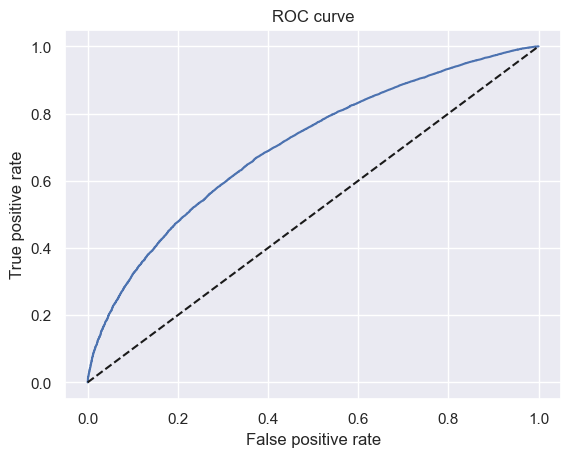

In [70]:
# Plot the ROC curve.
plt.plot(fpr, tpr)

# Plot a secondary diagonal dashed line.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

สร้าง DataFrame เพื่อเก็บผลที่ได้จาก roc_curve method:

In [71]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds),
                        pd.DataFrame(fpr),
                        pd.DataFrame(tpr)],
                       axis = 1) # Concat along the columns.

In [72]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [73]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992237,0.000000,0.000012
2,0.990488,0.000000,0.000193
3,0.990484,0.000098,0.000193
4,0.989437,0.000098,0.000602


ที่แถวแรก roc_curve method ได้ตั้งให้ค่า threshold มีค่าเท่ากับ inf ซึ่งไม่ได้มีประโยชน์ในการช่วยตัดสินใจกำหนด Cut-off rates (และที่แถวแรกก็ไม่ได้มี false หรือ true positive rates อยู่แล้ว)

ซึ่งสามารถดรอปทิ้งไปทั้ง row เลยก็ได้ หรือเลือกที่จะเก็บไว้ แล้วตั้งให้ threshold แรกมีค่าเข้าใกล้ 1 แต่ไม่ใช่ 1

ตั้งให้ threshold แรกมีค่าเข้าใกล้ 1 แต่ไม่ใช่ 1 เช่น 1 - 1 / 10 ^ 16:

In [74]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

วิธีที่นิยมในการกำหนด cut-offs คือตัดสินใจจากความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ หรือตัดสินใจจาก credit scores ก็ได้

Credit scores สามารถแปลผลได้ง่ายกว่าก็จริง แต่ credit scores เป็น discrete values จึงมีความแม่นยำที่ต่ำกว่าความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้

ดังนั้น จึงจะตัดสินใจกำหนด cut-offs โดยใช้ความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้

ทำการ reverse สมการก่อนหน้านี้ที่ใช้คำนวณความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้โดยใช้ credit scores จะได้:

$$score\_from\_prob = \left( \ln \frac{prob\_good}{1-prob\_good} - min\_sum\_coef \right) \frac{(max\_score-min\_score)}{(max\_sum\_coef-min\_sum\_coef)} + min\_score$$

คำนวณคะแนนสำหรับแต่ละ threshold:

In [75]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [76]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2031.0
1,0.992237,0.000000,0.000012,787.0
2,0.990488,0.000000,0.000193,771.0
3,0.990484,0.000098,0.000193,771.0
4,0.989437,0.000098,0.000602,763.0


คะแนนของ row แรก สูงมากและ out of range จึงแทนค่าด้วยคะแนนสูงสุดแทน:

In [77]:
df_cutoffs['Score'][0] = max_score

In [78]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992237,0.000000,0.000012,787.0
2,0.990488,0.000000,0.000193,771.0
3,0.990484,0.000098,0.000193,771.0
4,0.989437,0.000098,0.000602,763.0


In [79]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17232,0.484475,0.999607,0.999976,416.0
17233,0.452833,0.999902,0.999976,407.0
17234,0.390521,0.999902,0.999988,387.0
17235,0.387794,1.000000,0.999988,386.0
17236,0.366399,1.000000,1.000000,380.0


จากสองตารางข้างบนพบว่าคะแนนอยู่ในช่วงที่ควรจะเป็นแล้ว

เขียนฟังก์ชั่นคำนวณจำนวนของผู้ขอกู้ที่ได้รับการอนุมัติ นั่นคือ จำนวนของผู้ขอกู้ที่มีความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้สูงกว่าค่า threshold (p):

In [80]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

คำนวณอัตราการอนุมัติและปฏิเสธการกู้ยืมสำหรับแต่ละ cut-offs:

In [81]:
# Number of Approved + Number of Rejected = Total 
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

# Number of Rejected = Total - Number of Approved
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval Rate = Number of Approved / Total
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection Rate = 1 - Approval Rate
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [82]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992237,0.000000,0.000012,787.0,1,93256,0.000011,0.999989
2,0.990488,0.000000,0.000193,771.0,16,93241,0.000172,0.999828
3,0.990484,0.000098,0.000193,771.0,17,93240,0.000182,0.999818
4,0.989437,0.000098,0.000602,763.0,51,93206,0.000547,0.999453


In [83]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17232,0.484475,0.999607,0.999976,416.0,93251,6,0.999936,0.000064
17233,0.452833,0.999902,0.999976,407.0,93254,3,0.999968,0.000032
17234,0.390521,0.999902,0.999988,387.0,93255,2,0.999979,0.000021
17235,0.387794,1.000000,0.999988,386.0,93256,1,0.999989,0.000011
17236,0.366399,1.000000,1.000000,380.0,93257,0,1.000000,0.000000


**สมมติว่า Probability of Default (PD) สูงสุดที่ยอมรับได้คือ 10%** (นั่นคือ ความน่าจะเป็นที่จะไม่ผิดนัดการชำระหนี้ขั้นต่ำที่ยอมรับได้คือ 90%):

In [84]:
df_cutoffs.iloc[5310: 5330, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5310,0.900061,0.277625,0.568686,587.0,50068,43189,0.536882,0.463118
5311,0.900046,0.277625,0.568806,587.0,50078,43179,0.536989,0.463011
5312,0.900046,0.277723,0.568806,587.0,50079,43178,0.537000,0.463000
5313,0.900042,0.277723,0.568842,587.0,50082,43175,0.537032,0.462968
5314,0.900038,0.277821,0.568842,587.0,50083,43174,0.537043,0.462957
5315,0.900033,0.277821,0.568902,587.0,50088,43169,0.537096,0.462904
5316,0.900032,0.277920,0.568902,587.0,50089,43168,0.537107,0.462893
5317,0.900028,0.277920,0.568938,587.0,50092,43165,0.537139,0.462861
5318,0.900027,0.278018,0.568938,587.0,50093,43164,0.537150,0.462850
5319,0.900021,0.278018,0.568974,587.0,50096,43161,0.537182,0.462818


ที่ index = 5322 มี threshold = 0.900003 มี credit score เทียบเท่า 587 คะแนน

จะมีผู้ขอกู้ที่ได้รับการอนุมัติอยู่ที่ 53.72% และถูกปฏิเสธอยู่ที่ 46.27%

**สมมติว่า Probability of Default (PD) สูงสุดที่ยอมรับได้คือ 5%** (นั่นคือ ความน่าจะเป็นที่จะไม่ผิดนัดการชำระหนี้ขั้นต่ำที่ยอมรับได้คือ 95%):

In [85]:
df_cutoffs.iloc[1120: 1150, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1120,0.950273,0.056133,0.226648,643.0,19399,73858,0.208017,0.791983
1121,0.950271,0.056232,0.226648,643.0,19400,73857,0.208027,0.791973
1122,0.950161,0.056232,0.227383,643.0,19461,73796,0.208681,0.791319
1123,0.950153,0.056428,0.227383,643.0,19463,73794,0.208703,0.791297
1124,0.950111,0.056428,0.227599,643.0,19481,73776,0.208896,0.791104
1125,0.950110,0.056526,0.227599,643.0,19482,73775,0.208907,0.791093
1126,0.950109,0.056526,0.227611,643.0,19483,73774,0.208917,0.791083
1127,0.950108,0.056624,0.227611,643.0,19484,73773,0.208928,0.791072
1128,0.950103,0.056624,0.227660,643.0,19488,73769,0.208971,0.791029
1129,0.950102,0.056722,0.227660,643.0,19489,73768,0.208982,0.791018


ที่ index = 1130 มี threshold = 0.950070 มี credit score เทียบเท่า 643 คะแนน

จะมีผู้ขอกู้ที่ได้รับการอนุมัติอยู่ที่ 20.91% และถูกปฏิเสธอยู่ที่ 79.08%

---

### Export

บันทึก inputs_train_with_ref_cat และ scorecard ลง disk:

In [86]:
inputs_train_with_ref_cat.to_csv('./data/inputs_train_with_ref_cat.csv')

In [87]:
df_scorecard.to_csv('./data/df_scorecard.csv')

---

**Note:**

credit scores เป็น discrete values จึงมีความแม่นยำที่ต่ำกว่าความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้ สมมติว่าตั้ง cut-off ไว้ที่ credit scores = 630:

In [88]:
df_cutoffs[df_cutoffs['Score']==630]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1656,0.941535,0.083906,0.287840,630.0,24765,68492,0.265556,0.734444
1657,0.941532,0.084004,0.287840,630.0,24766,68491,0.265567,0.734433
1658,0.941531,0.084004,0.287876,630.0,24769,68488,0.265599,0.734401
1659,0.941529,0.084102,0.287876,630.0,24770,68487,0.265610,0.734390
1660,0.941486,0.084102,0.288249,630.0,24801,68456,0.265943,0.734057
1661,0.941485,0.084200,0.288249,630.0,24802,68455,0.265953,0.734047
1662,0.941453,0.084200,0.288454,630.0,24819,68438,0.266136,0.733864
1663,0.941452,0.084298,0.288454,630.0,24820,68437,0.266146,0.733854
1664,0.941441,0.084298,0.288562,630.0,24829,68428,0.266243,0.733757
1665,0.941441,0.084396,0.288562,630.0,24830,68427,0.266253,0.733747


จากตารางข้างบน หาก`ตัดสินใจจาก credit scores` จะทำให้มีผู้ขอกู้ที่ได้รับการอนุมัติเป็นไปได้ตั้งแต่ 26.55% ถึง 27.06% ซึ่งความแม่นยำจะต่ำกว่าการกำหนด cut-offs โดย`ตัดสินใจจากความน่าจะเป็นที่จะไม่ผิดนัดชำระหนี้`